In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
from sklearn.datasets import fetch_openml

# Carrega o dataset MNIST do OpenML (70.000 imagens de dígitos manuscritos 28x28)
mnist = fetch_openml('mnist_784', version=1)
# Separa os dados em X (pixels das imagens) e y (rótulos dos dígitos de 0 a 9)
X, y = mnist["data"], mnist["target"]

print(X.shape, y.shape)
Xnp = X.to_numpy() # Converte o DataFrame de entrada (X) para um array NumPy
ynp = y.to_numpy() # Converte o DataFrame de entrada (y) para um array NumPy
print(Xnp.shape)

(70000, 784) (70000,)
(70000, 784)


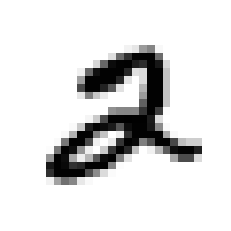

2


In [3]:
# Seleciona o primeiro vetor de pixels da base de dados (representa uma imagem 28x28 achatada)
some_digit = Xnp[5]

# Redimensiona o vetor de 784 elementos para uma matriz 28x28 (formato da imagem original)
some_digit_image = some_digit.reshape(28, 28)

# Exibe a imagem em escala de cinza (cmap=mpl.cm.binary)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)

# Remove os eixos da visualização
plt.axis("off")

plt.show()
print(y[5])

In [4]:
# Função para exibir um único dígito (imagem 28x28)
def plot_digit(data):
    image = data.reshape(28, 28)  # Redimensiona o vetor 1D para matriz 2D
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")  # Exibe a imagem em escala de cinza
    plt.axis("off")  # Remove os eixos para visualização limpa

# Função para exibir múltiplos dígitos lado a lado em um grid
def plot_digits(instances, images_per_row=10, **options):
    size = 28  # Tamanho da imagem (28x28)
    images_per_row = min(len(instances), images_per_row)  # Limita o número de imagens por linha

    # Redimensiona cada vetor de pixels para imagem 28x28
    images = [instance.reshape(size, size) for instance in instances]

    # Calcula o número de linhas necessárias
    n_rows = (len(instances) - 1) // images_per_row + 1

    row_images = []

    # Calcula o número de espaços vazios para completar a última linha (se necessário)
    n_empty = n_rows * images_per_row - len(instances)

    # Adiciona imagens vazias se necessário para completar o grid
    images.append(np.zeros((size, size * n_empty)))

    # Concatena horizontalmente as imagens de cada linha
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))  # Concatenação horizontal (linha)

    # Concatena verticalmente todas as linhas para formar a imagem final do grid
    image = np.concatenate(row_images, axis=0)

    # Exibe o grid de imagens
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")  # Remove eixos

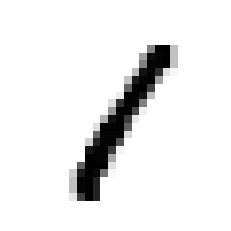

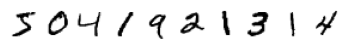

In [5]:
# Exibe a imagem correspondente ao quarto dígito no dataset (índice 3)
plot_digit(Xnp[3])
plt.show()  # Mostra a imagem individual na tela

# Exibe os 10 primeiros dígitos do dataset em um grid (1 linha com 10 imagens)
plot_digits(Xnp[0:10])
plt.show()  # Mostra o grid de imagens

In [6]:
from sklearn.model_selection import train_test_split

# Divide o conjunto de dados em treino e teste:
# - Xnp: dados (imagens)
# - ynp: rótulos (dígitos)
# - test_size=10000: separa 10.000 amostras para teste
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=10000, random_state=42)

In [16]:
# Cria um vetor booleano onde cada entrada indica se o rótulo é o dígito '5'
# Isso transforma o problema em uma classificação binária: é ou não o dígito 5
y_train_5 = (y_train == '5')  # True para imagens do dígito 5, False caso contrário
y_test_5  = (y_test == '5')  # Mesmo para o conjunto de teste

print(y_train_5)
print(y_test_5)

[False False False ... False False False]
[False False False ... False False False]


## Usando um Stochastic Gradient Descent (SGD)

In [17]:
from sklearn.linear_model import SGDClassifier

# Cria um classificador linear usando Stochastic Gradient Descent (SGD)
# - max_iter=1000: número máximo de iterações (épocas)
# - random_state=42: para reprodutibilidade dos resultados
sgd_clf = SGDClassifier(max_iter=1000, random_state=42)

# Treina o classificador com os dados de treino (X_train) e os rótulos binários (y_train_5)
# O modelo aprenderá a distinguir dígitos '5' de 'não 5'
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

[ True]


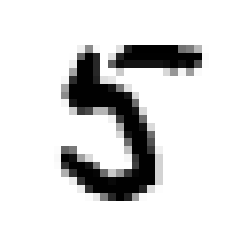

[False]


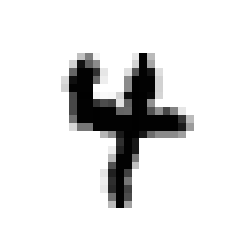

In [18]:
# Faz uma previsão para a imagem de índice 15 no conjunto de teste (X_test)
# A previsão indicará se o classificador considera que é o dígito '5' (True) ou não (False)
print(sgd_clf.predict([X_test[15]]))

# Exibe a imagem correspondente ao índice 15
plot_digit(X_test[15])
plt.show()

# Faz uma previsão para a imagem de índice 1 no conjunto de teste (X_test)
print(sgd_clf.predict([X_test[1]]))

# Exibe a imagem correspondente ao índice 1
plot_digit(X_test[1])
plt.show()

In [19]:
# Faz previsões para todas as imagens no conjunto de teste (X_test)
# O modelo classifica se cada imagem é o dígito '5' (True) ou não (False)
y_predict_5 = sgd_clf.predict(X_test)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Realiza a validação cruzada do modelo usando o conjunto de treino (X_train) e os rótulos binários (y_train_5)
# - cv=3: Divide os dados em 3 partes para realizar a validação cruzada (3-fold cross-validation)
# - scoring="accuracy": Calcula a acurácia do modelo em cada "fold" da validação cruzada
print(cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy"))

[0.9629  0.96775 0.96435]


In [21]:
# Calcula e exibe a acurácia do modelo no conjunto de teste
# A acurácia é a proporção de previsões corretas (verdadeiras positivas e negativas)
print("acuracia = {:2.3f} ".format(accuracy_score(y_test_5, y_predict_5)))

# Calcula e exibe a precisão e o recall (eficiência) do modelo no conjunto de teste
# - Precisão: Proporção de previsões positivas corretas (verdadeiras positivas / (verdadeiras positivas + falsas positivas))
# - Recall (eficiência): Proporção de casos positivos corretamente identificados (verdadeiras positivas / (verdadeiras positivas + falsas negativas))
print("precisao = {:2.3f} e eficiencia = {:2.3f}".format(precision_score(y_test_5, y_predict_5), recall_score(y_test_5, y_predict_5)))

acuracia = 0.966 
precisao = 0.853 e eficiencia = 0.767


In [22]:
from sklearn.base import BaseEstimator

# Cria uma classe personalizada para um classificador que nunca prevê o dígito '5'
class Never5Classifier(BaseEstimator):
    # O método fit é necessário para a compatibilidade com a API do Scikit-learn, mas não faz nada aqui
    def fit(self, X, y=None):
        pass  # Não precisa treinar nada, pois o modelo sempre retorna a mesma previsão
    
    # O método predict sempre retorna "False" (ou seja, nunca prevê o dígito '5')
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)  # Retorna um array de "False" para cada entrada de X

In [23]:
# Cria uma instância do classificador Never5, que nunca prevê o dígito '5'
never_5_clf = Never5Classifier()

# Avalia a acurácia do Never5Classifier usando validação cruzada com 3 divisões (folds) no conjunto de treino
# Como esse modelo nunca prevê '5', a acurácia será provavelmente baixa
print(cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy"))

# Faz previsões no conjunto de teste (X_test) usando o classificador Never5
y_pred_never_5 = never_5_clf.predict(X_test)

# Avalia a acurácia das previsões do Never5Classifier no conjunto de teste
# A acurácia aqui será a proporção de exemplos que não são '5', já que ele sempre prevê 'não 5'
print(accuracy_score(y_test_5, y_pred_never_5))

[0.9119  0.90875 0.91055]
0.9063


In [24]:
# Calcula e exibe a precisão e o recall (eficiência) do modelo Never5 no conjunto de teste
# - Precisão: Proporção de previsões positivas (verdadeiras positivas) entre todas as previsões positivas feitas (verdadeiras positivas + falsas positivas)
# - Recall (Eficiência): Proporção de casos positivos corretamente identificados (verdadeiras positivas / (verdadeiras positivas + falsas negativas))
print(precision_score(y_test_5, y_pred_never_5), recall_score(y_test_5, y_pred_never_5))

0.0 0.0


/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.model_selection import cross_val_predict

# Realiza a validação cruzada para prever as classes no conjunto de treino (X_train)
# - A função cross_val_predict retorna as previsões feitas pelo modelo para cada amostra em X_train
# - cv=3 significa que será realizada uma validação cruzada com 3 divisões (folds)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [26]:
# Gera as previsões do classificador Never5 para todo o conjunto de treino X_train.
# Como o modelo Never5 nunca prevê '5', todas as previsões serão False.
y_train_predallzero = never_5_clf.predict(X_train)

# Gera as previsões perfeitas para o conjunto de treino, ou seja, as previsões ideais (y_train_5),
# onde cada rótulo indica se o dígito é ou não um '5' (True se for '5' e False se não for).
y_train_predperfect = y_train_5

In [27]:
from sklearn.metrics import confusion_matrix

# Calcula e exibe a matriz de confusão para as previsões no conjunto de teste
# A matriz de confusão mostra o desempenho do classificador em termos de:
# - Verdadeiras Positivas (VP): O modelo acertou quando o número era '5'
# - Falsas Positivas (FP): O modelo previu '5' quando não era
# - Verdadeiras Negativas (VN): O modelo acertou quando o número não era '5'
# - Falsas Negativas (FN): O modelo previu que não era '5' quando era
print("Test sample confusion matrix")
print(confusion_matrix(y_test_5, y_predict_5))  # Matriz de confusão no conjunto de teste

print("\n")

# Calcula e exibe a matriz de confusão para as previsões no conjunto de treino
print("Training sample confusion matrix")
print(confusion_matrix(y_train_5, y_train_pred))  # Matriz de confusão no conjunto de treino

Test sample confusion matrix
[[8939  124]
 [ 218  719]]


Training sample confusion matrix
[[54103   521]
 [ 1579  3797]]


In [28]:
# Calcula e exibe a matriz de confusão para as previsões perfeitas no conjunto de treino.
# Essa matriz de confusão reflete o desempenho ideal, ou seja, o comportamento perfeito
# do modelo, onde a previsão de cada amostra é igual ao valor real (y_train_5).
print("Perfect score confusion matrix")
print(confusion_matrix(y_train_5, y_train_predperfect))  # Matriz de confusão com previsões perfeitas

Perfect score confusion matrix
[[54624     0]
 [    0  5376]]


In [29]:
# Calcula e exibe a matriz de confusão para as previsões do modelo Never5 no conjunto de treino.
# Como o modelo Never5 nunca prevê '5', todas as previsões serão 'False'.
# A matriz de confusão refletirá a performance do modelo Never5, que só acerta em "não 5".
print("Never 5 confusion matrix")
print(confusion_matrix(y_train_5, y_train_predallzero))  # Matriz de confusão para o Never5

Never 5 confusion matrix
[[54624     0]
 [ 5376     0]]


In [30]:
# Calcula e exibe a precisão (precision) para o conjunto de treino.
# A precisão é a proporção de exemplos positivos corretamente identificados (VP) em relação
# ao total de exemplos classificados como positivos pelo modelo (VP + FP).
print("precision {:2.1f}%".format(100 * precision_score(y_train_5, y_train_pred)))

# Calcula e exibe o recall (sensibilidade) para o conjunto de treino.
# O recall é a proporção de exemplos positivos corretamente identificados (VP) em relação
# ao total de exemplos positivos reais (VP + FN).
print("recall {:2.1f}%".format(100 * recall_score(y_train_5, y_train_pred)))

precision 87.9%
recall 70.6%


In [31]:
# Calcula os "scores" de decisão para as amostras do conjunto de treino.
# A função `decision_function` retorna uma pontuação que indica a confiança do modelo
# em sua previsão para cada amostra. Para classificadores binários, valores mais altos
# indicam maior confiança de que a amostra pertence à classe positiva (por exemplo, '5').
y_scores = sgd_clf.decision_function(X_train)

# Exibe o "score" de decisão da primeira amostra do conjunto de treino.
# Esse valor pode ser usado para decidir se a amostra será classificada como '5' ou não.
print(y_scores[0])

-14144.5060620584


In [32]:
from sklearn.metrics import precision_recall_curve

# Calcula as curvas de precisão e recall para diferentes valores de limiar (threshold).
# A função `precision_recall_curve` retorna três variáveis:
# - `precisions`: a precisão para cada valor de limiar.
# - `recalls`: o recall para cada valor de limiar.
# - `thresholds`: os limiares (scores) para os quais as métricas de precisão e recall são calculadas.
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [33]:
# Encontra o limiar (threshold) onde a precisão é maior ou igual a 90%,
# ou seja, o primeiro ponto onde a precisão ultrapassa 90% no vetor de precisões.
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

# Exibe o ponto de corte (threshold) onde a precisão atinge 90% ou mais.
print("Ponto de corte onde alcança precisão >90% :", threshold_90_precision)

# Encontra o valor de recall correspondente ao limiar onde a precisão é maior ou igual a 90%.
# Esse é o recall no ponto de corte encontrado acima.
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]

# Exibe a eficiência (recall) para aquele ponto de corte (onde precisão é >90%).
print("Eficiência para aquele ponto de corte (precisão >90%) :", recall_90_precision)

Ponto de corte onde alcança precisão >90% : 483.11475110863324
Eficiência para aquele ponto de corte (precisão >90%) : 0.7345610119047619


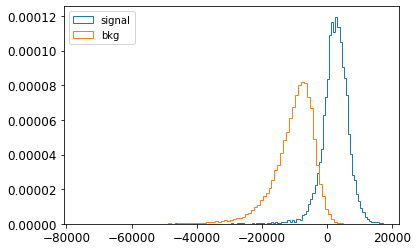

In [34]:
# Plota o histograma para as amostras com rótulo '5' (signal)
# y_scores[y_train_5] seleciona os scores das amostras em que o rótulo é '5' (signal)
# histtype='step' desenha o histograma com bordas, sem preenchimento
# density=True normaliza o histograma para que a área total seja 1 (probabilidade)
# bins=100 define o número de bins (faixa de valores) no histograma
plt.hist(y_scores[y_train_5], histtype='step', density=True, label='signal', bins=100)

# Plota o histograma para as amostras que não são da classe '5' (background)
# y_scores[~y_train_5] seleciona os scores das amostras que não são '5'
plt.hist(y_scores[~y_train_5], histtype='step', density=True, label='bkg', bins=100)

# Adiciona a legenda para identificar 'signal' e 'bkg'
plt.legend()

# Exibe o gráfico gerado
plt.show()

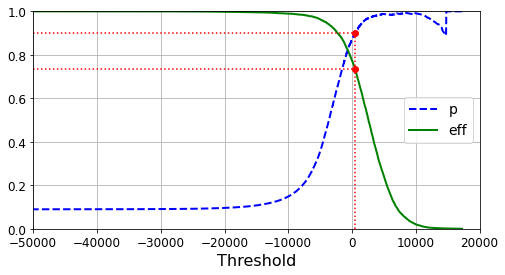

In [35]:
# Função para plotar precisão e recall em função do ponto de corte
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    # Plota a precisão (p) em azul, com linha tracejada
    plt.plot(thresholds, precisions[:-1], "b--", label="p", linewidth=2)
    # Plota a eficiência (recall) em verde, com linha contínua
    plt.plot(thresholds, recalls[:-1], "g-", label="eff", linewidth=2)
    # Adiciona a legenda no canto direito do gráfico
    plt.legend(loc="center right", fontsize=14)
    # Define o rótulo para o eixo x
    plt.xlabel("Threshold", fontsize=16)
    # Ativa o grid no gráfico
    plt.grid(True)
    # Define os limites dos eixos x (thresholds) e y (precisão e recall)
    plt.axis([-50000, 20000, 0, 1])

# Cria uma figura de tamanho 8x4
plt.figure(figsize=(8, 4))
# Chama a função para plotar precisão e recall em função do threshold
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# Plota linhas vermelhas para indicar o ponto de corte onde a precisão é > 90%
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
# Plota pontos vermelhos para destacar o ponto de corte e a precisão/recall correspondente
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
# Exibe o gráfico
plt.show()

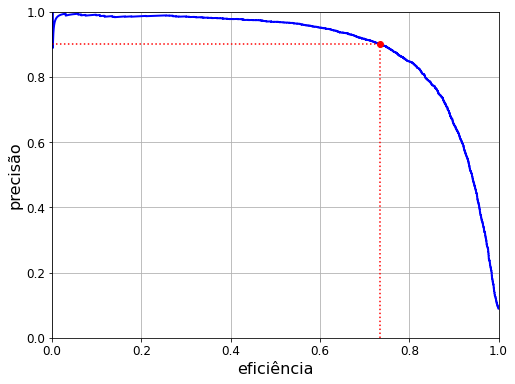

In [36]:
# Função para plotar precisão vs recall
def plot_precision_vs_recall(precisions, recalls):
    # Plota a curva de precisão (p) em função da eficiência (recall) em azul
    plt.plot(recalls, precisions, "b-", linewidth=2)
    # Define o rótulo para o eixo x (eficiência)
    plt.xlabel("eficiência", fontsize=16)
    # Define o rótulo para o eixo y (precisão)
    plt.ylabel("precisão", fontsize=16)
    # Define os limites dos eixos x (eficiência) e y (precisão)
    plt.axis([0, 1, 0, 1])
    # Ativa o grid no gráfico
    plt.grid(True)

# Cria uma figura de tamanho 8x6
plt.figure(figsize=(8, 6))
# Chama a função para plotar precisão vs recall
plot_precision_vs_recall(precisions, recalls)
# Plota linhas vermelhas para indicar o ponto de corte onde a precisão é 90%
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
# Plota um ponto vermelho para destacar o valor de recall e precisão correspondentes
plt.plot([recall_90_precision], [0.9], "ro")
# Exibe o gráfico
plt.show()

In [37]:
# Faz a previsão de classe para o limiar de precisão > 90%
y_train_pred_90 = (y_scores >= threshold_90_precision)

# Exibe a precisão para o ponto de corte com precisão > 90%
print("Precisão (>90%): {:2.2%}".format (precision_score(y_train_5, y_train_pred_90)))

# Exibe a acurácia para o ponto de corte com precisão > 90%
print("Acurácia para precisão > 90%: {:2.2%} ".format(accuracy_score(y_train_5, y_train_pred_90)))

# Exibe a eficiência (recall) para o ponto de corte com precisão > 90%
rec_point = recall_score(y_train_5, y_train_pred_90)
print("Eficiência para precisão > 90%: {:2.2%}".format(rec_point))

Precisão (>90%): 90.02%
Acurácia para precisão > 90%: 96.89% 
Eficiência para precisão > 90%: 73.46%


In [38]:
from sklearn.metrics import roc_curve

# Calcula a curva ROC (Receiver Operating Characteristic)
# fpr (taxa de falsos positivos), tpr (taxa de verdadeiros positivos) e os limiares de decisão
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [39]:
# Encontra o valor de fpr no ponto de corte que corresponde à precisão > 90%
fpr_point = fpr[np.argmax(thresholds <= threshold_90_precision)]

# Exibe a taxa de falsos positivos nesse ponto de corte
print("{:2.4e}".format(fpr_point))

8.0368e-03


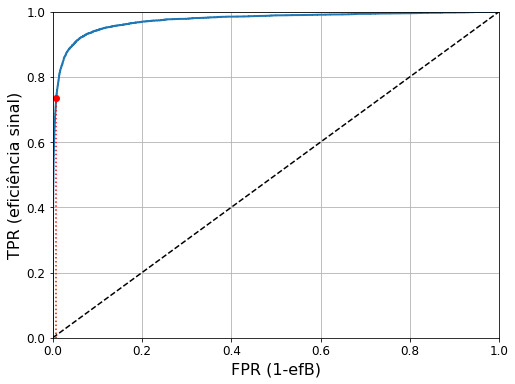

In [40]:
# Função para plotar a curva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # Plota a curva ROC
    plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal tracejada, representação da curva aleatória
    plt.axis([0, 1, 0, 1])  # Define o intervalo dos eixos x e y para a curva
    plt.xlabel('FPR (1-efB)', fontsize=16)  # Rótulo do eixo x (taxa de falsos positivos)
    plt.ylabel('TPR (eficiência sinal)', fontsize=16)  # Rótulo do eixo y (taxa de verdadeiros positivos)
    plt.grid(True)  # Adiciona a grade no gráfico

# Cria uma nova figura para o gráfico
plt.figure(figsize=(8, 6))

# Plota a curva ROC
plot_roc_curve(fpr, tpr)

# Plota linhas vermelhas para indicar o ponto de corte
plt.plot([fpr_point, fpr_point], [0., rec_point], "r:")  # Linha vertical no ponto de corte (fpr_point)
plt.plot([0.0, fpr_point], [rec_point, rec_point], "r:")  # Linha horizontal no ponto de corte (rec_point)
plt.plot([fpr_point], [rec_point], "ro")  # Marca o ponto de corte com um ponto vermelho

# Exibe o gráfico
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score

# Calcula a área sob a curva ROC (AUC) para os dados de treinamento
AUC = roc_auc_score(y_train_5, y_scores)

# Exibe o valor da AUC
print(AUC)

0.9741394824488451


## Usando uma RandomForest

In [42]:
# Importa a classe RandomForestClassifier da biblioteca sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Cria uma instância do classificador RandomForest com 100 árvores (n_estimators) e uma semente aleatória fixa (random_state)
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Usa cross-validation para fazer previsões de probabilidades para cada amostra no conjunto de treinamento
# method="predict_proba" retorna as probabilidades de classe, não as previsões de classe
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [43]:
# Extrai a probabilidade da classe positiva ("5") das previsões do modelo Random Forest
y_scores_forest = y_probas_forest[:, 1]  # A segunda coluna (índice 1) contém as probabilidades da classe "5" (classe positiva)

# Calcula a curva ROC (Receiver Operating Characteristic) e os pontos de corte (thresholds)
# fpr_forest: False Positive Rate (taxa de falsos positivos)
# tpr_forest: True Positive Rate (taxa de verdadeiros positivos)
# thresholds_forest: os pontos de corte correspondentes
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# Calcula a curva Precision-Recall (precisão vs. eficiência) e os pontos de corte
# prec_forest: precisão (taxa de positivos corretamente classificados)
# rec_forest: recall (eficiência ou taxa de verdadeiros positivos)
# threshs_frst: pontos de corte correspondentes
prec_forest, rec_forest, threshs_frst = precision_recall_curve(y_train_5, y_scores_forest)

In [44]:
# Encontrar o limiar de corte onde a precisão (precision) é maior ou igual a 0.9
thr_frst_90 = threshs_frst[np.argmax(prec_forest >= 0.9)]
print("limiar para precision de 0.9 ===>  ", thr_frst_90)

# Calcular as previsões no limiar de precisão >= 0.9
y_pred_frst_90 = (y_scores_forest >= thr_frst_90)

# Calcular o recall e a taxa de falsos positivos (FPR) no limiar de precisão >= 0.9
rec_pnt_frst = rec_forest[np.argmax(y_pred_frst_90)]
fpr_pnt_frst = fpr_forest[np.argmax(y_pred_frst_90)]

# Exibir os resultados
print("recall neste limiar = ", rec_pnt_frst)
print("taxa de falsos positivos neste limiar= ", fpr_pnt_frst)

limiar para precision de 0.9 ===>   0.24
recall neste limiar =  0.9719122023809523
taxa de falsos positivos neste limiar=  7.322788517867604e-05


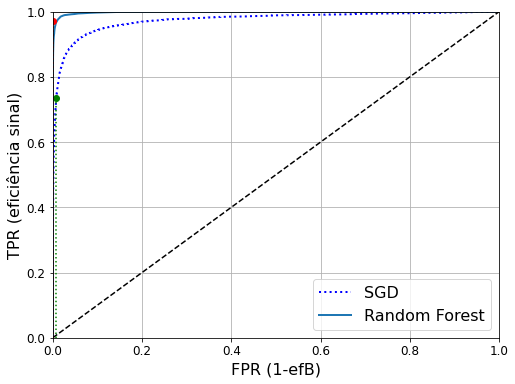

In [45]:
# Definir o tamanho da figura para o gráfico ROC
plt.figure(figsize=(8, 6))

# Plotar a curva ROC para o classificador SGD, utilizando a cor azul e linha pontilhada
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")

# Plotar a curva ROC para o classificador Random Forest, utilizando a cor padrão para a linha
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

# Adicionar linhas e marcadores para o ponto de corte do SGD (precisão >= 90%)
plt.plot([fpr_point, fpr_point], [0., rec_point], "g:")  # Linha verde vertical para o fpr do SGD
plt.plot([0.0, fpr_point], [rec_point, rec_point], "g:")  # Linha verde horizontal para o recall do SGD
plt.plot([fpr_point], [rec_point], "go")  # Ponto verde para indicar o corte no SGD

# Adicionar linhas e marcadores para o ponto de corte do Random Forest (precisão >= 90%)
plt.plot([fpr_pnt_frst, fpr_pnt_frst], [0., rec_pnt_frst], "r:")  # Linha vermelha vertical para o fpr do Random Forest
plt.plot([fpr_pnt_frst], [rec_pnt_frst], "ro")  # Ponto vermelho para indicar o corte no Random Forest

# Adicionar grid para melhorar a visualização
plt.grid(True)

# Adicionar a legenda para os dois classificadores (SGD e Random Forest)
plt.legend(loc="lower right", fontsize=16)

# Exibir o gráfico ROC com os pontos de corte e curvas para ambos os classificadores
plt.show()

In [46]:
# Calcular o AUC para o Random Forest
roc_auc_score(y_train_5, y_scores_forest)

0.9984563317302746

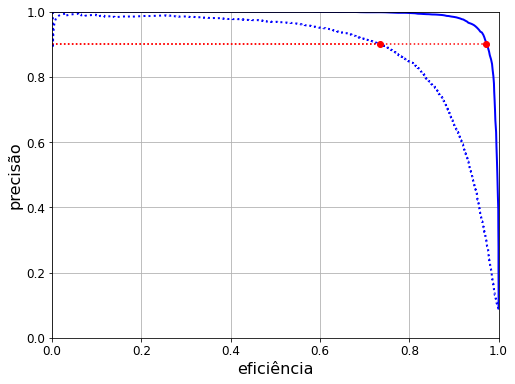

In [47]:
plt.figure(figsize=(8, 6))
# Plotando a curva de precisão vs. recall para o modelo SGD
plt.plot(recalls, precisions, "b:", label="SGD", linewidth=2)
# Plotando a curva de precisão vs. recall para o modelo Random Forest
plot_precision_vs_recall(prec_forest, rec_forest)
# Linha e ponto para o modelo SGD com precisão > 90%
plt.plot([0, rec_point], [0.9, 0.9], "r:")
plt.plot([rec_point], [0.9], "ro")
# Linha e ponto para o modelo Random Forest com precisão > 90%
plt.plot([0, rec_pnt_frst], [0.9, 0.9], "r:")
plt.plot([rec_pnt_frst], [0.9], "ro")
# Exibindo o gráfico
plt.show()

In [48]:
from sklearn.metrics import f1_score
## f1 = (p*r)/(p+r)
print("Score F1 para SGD ",f1_score(y_train_5, y_train_pred_90))
print("Score F1 para Random Forest ",f1_score(y_train_5, y_pred_frst_90))

Score F1 para SGD  0.808972651848817
Score F1 para Random Forest  0.9381452554089236


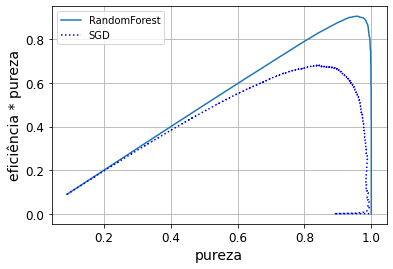

In [49]:
plt.plot(prec_forest,prec_forest*rec_forest,label="RandomForest")
plt.plot(precisions,precisions*recalls,"b:",label="SGD")
plt.grid(True)
plt.xlabel("pureza")
plt.ylabel("eficiência * pureza")
plt.legend(loc="upper left")
plt.show()

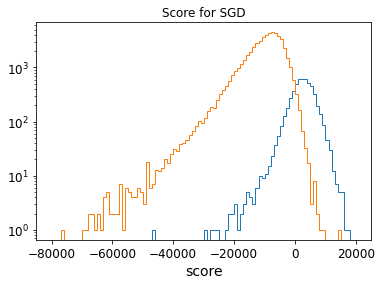

In [50]:
y_scores_only_signals = y_scores[y_train_5]
y_scores_only_backg = y_scores[~y_train_5]
#h = np.histogram(y_scores_only_signals,bins=100,range(0,1000))
plt.hist(y_scores_only_signals,bins=100,range=(-80000,20000),histtype="step")
plt.hist(y_scores_only_backg,bins=100,range=(-80000,20000),histtype="step")
plt.yscale("log")
plt.title("Score for SGD")
plt.xlabel("score")
plt.show()

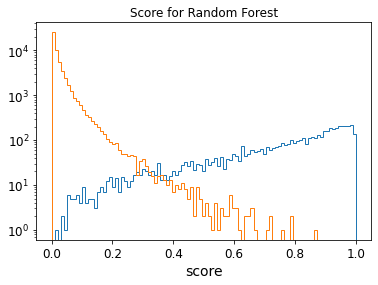

In [51]:
y_scores_only_signals_frst = y_scores_forest[y_train_5]
y_scores_only_backg_frst = y_scores_forest[~y_train_5]
#h = np.histogram(y_scores_only_signals,bins=100,range(0,1000))
plt.hist(y_scores_only_signals_frst,bins=101,range=(0.,1.),histtype="step")
plt.hist(y_scores_only_backg_frst,bins=101,range=(0.,1.),histtype="step")
plt.yscale("log")
plt.title("Score for Random Forest")
plt.xlabel("score")
plt.show()

In [52]:
# Índices das amostras com as classes 3, 5 ou 8
indx = [i for i, y in enumerate(y_train) if y in ["3", "5", "8"]]

# Filtragem dos dados
X_train_reduced = X_train[indx]
y_train_5_reduced = y_train_5[indx]

# Exibindo as formas dos dados antes e depois da redução
print(X_train.shape)             # Forma original de X_train
print(X_train_reduced.shape)     # Forma de X_train após redução

(60000, 784)
(17339, 784)


In [53]:
# Criando o modelo de Random Forest
forest_redx_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizando a validação cruzada e obtendo as probabilidades previstas
y_probas_forest_reduced = cross_val_predict(forest_redx_clf, X_train_reduced, y_train_5_reduced, cv=3, 
                                            method="predict_proba")

In [54]:
# y_scores_frst_redx armazena as probabilidades da classe positiva (classe 1) do modelo florestal reduzido
y_scores_frst_redx = y_probas_forest_reduced[:, 1]  # score = probabilidade da classe positiva

# Calculando a curva ROC (taxa de falso positivo e taxa de verdadeiro positivo) 
# usando as probabilidades da classe positiva e os rótulos verdadeiros
fpr_frst_rdx, tpr_frst_rdx, thresholds_frst_redx = roc_curve(y_train_5_reduced, y_scores_frst_redx)

# Calculando a curva de precisão e recall, com base nas probabilidades da classe positiva e os rótulos verdadeiros
prec_frst_rdx, rec_frst_rdx, threshs_frst_redx = precision_recall_curve(y_train_5_reduced, y_scores_frst_redx)

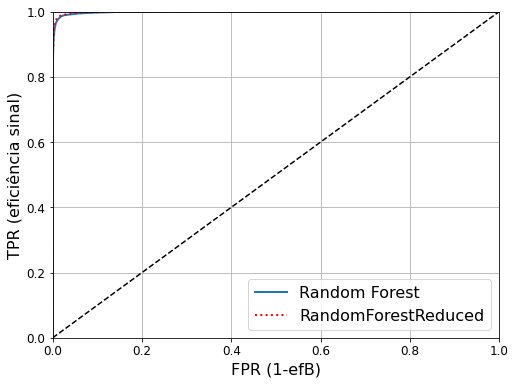

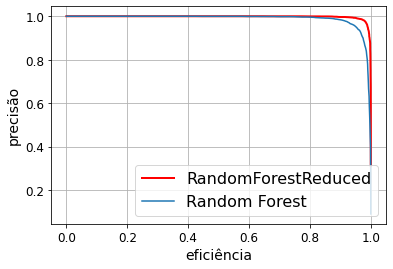

In [55]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot(fpr_frst_rdx, tpr_frst_rdx, "r:", linewidth=2, label="RandomForestReduced")

plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

plt.plot(rec_frst_rdx,prec_frst_rdx,"r",linewidth=2,label="RandomForestReduced")
plt.plot(rec_forest,prec_forest,label="Random Forest")
plt.xlabel("eficiência")
plt.ylabel("precisão")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
# from keras.utils import np_utils  # Descomentado apenas se necessário para a conversão de rótulos

# Definindo o tamanho do lote para o treinamento
batch_size = 64
# Definindo o número de épocas para o treinamento
epochs = 20
# Proporção dos dados de treinamento que será usada como validação
val_split = 0.3

# Taxa de aprendizado do otimizador
lr = 0.1

# Pré-processamento dos dados de treinamento e teste: conversão para 'float32' e normalização para o intervalo [0, 1]
X_train_mlp = X_train.astype('float32')
X_test_mlp = X_test.astype('float32')
X_train_mlp /= 255
X_test_mlp /= 255

2025-05-14 03:12:47.417853: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-14 03:12:47.706079: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [57]:
# Modelo Multilayer Perceptron (MLP) 
model = Sequential()

# Primeira camada oculta com 100 unidades, função de ativação ReLU, e inicialização dos pesos normal
model.add(Dense(input_dim=784, activation="relu", units=100, kernel_initializer="normal"))

# Segunda camada oculta com 30 unidades e função de ativação ReLU, sem necessidade de especificar input_dim
model.add(Dense(activation="relu", units=30, kernel_initializer="normal"))

# Terceira camada oculta com 10 unidades e função de ativação ReLU, sem necessidade de especificar input_dim
model.add(Dense(activation="relu", units=10, kernel_initializer="normal"))

# Camada de saída com uma unidade e função de ativação sigmoide, para saída binária
model.add(Dense(activation="sigmoid", units=1, kernel_initializer="normal"))

# Compilando o modelo com otimizador SGD, taxa de aprendizado definida, perda de erro quadrático médio e métrica de precisão
model.compile(optimizer=SGD(learning_rate=lr), loss='mean_squared_error', metrics=['accuracy'])

# Resumo do modelo, mostrando as camadas e parâmetros treináveis
model.summary()

/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,851 (319.73 KB)

 Trainable params: 81,851 (319.73 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Treinando o modelo utilizando os dados de treinamento, com validação e parâmetros especificados
history = model.fit(X_train_mlp, y_train_5, 
                    validation_split=val_split,  # Proporção de dados para validação
                    epochs=epochs,                # Número de épocas para o treinamento (definido anteriormente)
                    batch_size=batch_size,        # Tamanho do lote para o treinamento
                    verbose=1)                    # Exibe o progresso do treinamento

Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9086 - loss: 0.1190 - val_accuracy: 0.9094 - val_loss: 0.0819
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9116 - loss: 0.0796 - val_accuracy: 0.9094 - val_loss: 0.0782
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9092 - loss: 0.0754 - val_accuracy: 0.9094 - val_loss: 0.0644
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9196 - loss: 0.0533 - val_accuracy: 0.9523 - val_loss: 0.0360
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9737 - loss: 0.0226 - val_accuracy: 0.9749 - val_loss: 0.0202
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9812 - loss: 0.0161 - val_accuracy: 0.9824 - val_loss: 0.0142
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9862 - loss: 0.0120 - val_accuracy: 0.9828 - val_loss: 0.0134
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9892 - loss: 0.0096 - val_accuracy: 0.

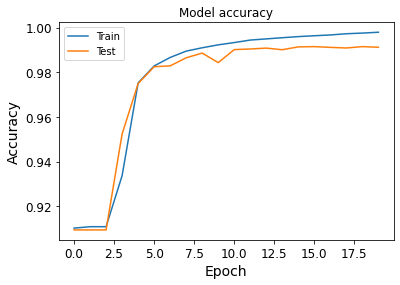

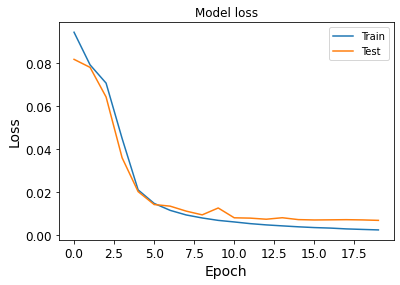

In [59]:
# Training History Visualization
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [60]:
# Fazendo previsões com o modelo treinado usando os dados de teste
y_predtest_mlp = model.predict(X_test_mlp)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [61]:
# Fazendo previsões com o modelo treinado usando os dados de treinamento
y_pred_mlp = model.predict(X_train_mlp)

# Calculando a curva de precisão e recall com base nas previsões e nos rótulos reais de treinamento
prec_mlp, rec_mlp, thresh_mlp = precision_recall_curve(y_train_5, y_pred_mlp)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


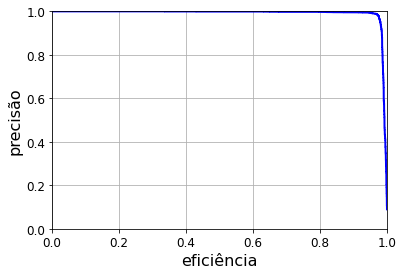

In [62]:
# Chamando a função plot_precision_vs_recall para plotar a curva de precisão versus recall
# A função recebe como parâmetros os valores de precisão (prec_mlp) e recall (rec_mlp) calculados anteriormente
plot_precision_vs_recall(prec_mlp, rec_mlp)

In [63]:
# Calculando a curva ROC (taxa de falso positivo e taxa de verdadeiro positivo) 
# com base nas previsões do modelo (y_pred_mlp) e nos rótulos verdadeiros (y_train_5)
fpr_mlp, tpr_mlp, threshs_mlp = roc_curve(y_train_5, y_pred_mlp)

0.9974251530920475


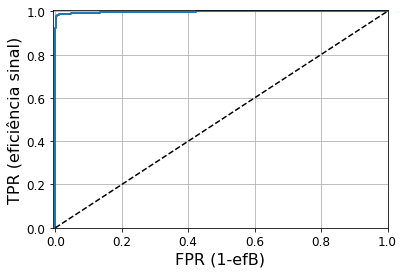

In [64]:
# Chamando a função plot_roc_curve para plotar a curva ROC
# A função recebe os valores de taxa de falso positivo (fpr_mlp) e taxa de verdadeiro positivo (tpr_mlp) calculados anteriormente
plot_roc_curve(fpr_mlp, tpr_mlp)

# Ajustando os limites dos eixos do gráfico para a curva ROC
# Eixo X vai de -0.008 a 1, e o eixo Y vai de 0.0 a 1.004
plt.axis([-0.008, 1, 0.0, 1.004])

# Calculando e imprimindo a área sob a curva ROC (AUC)
# A função roc_auc_score calcula o valor de AUC com base nos rótulos verdadeiros (y_train_5) e nas previsões (y_pred_mlp)
print(roc_auc_score(y_train_5, y_pred_mlp))

In [65]:
# Calculando e imprimindo a área sob a curva ROC (AUC) para os dados de teste
# A função roc_auc_score calcula o valor de AUC com base nos rótulos verdadeiros (y_test_5) e nas previsões do modelo para os dados de teste (y_predtest_mlp)
print(roc_auc_score(y_test_5, y_predtest_mlp))

0.997259312878156


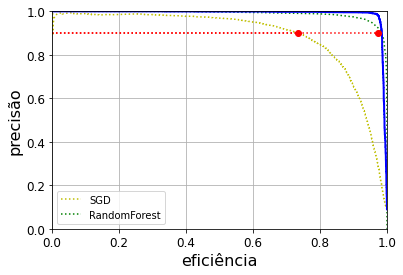

In [66]:
plt.plot(recalls,precisions,"y:",label="SGD")
plt.plot(prec_forest,rec_forest,"g:",label="RandomForest")
plot_precision_vs_recall(prec_mlp,rec_mlp)
plt.plot([0,rec_point],[0.9,0.9],"r:")
plt.plot([rec_point],[0.9],"ro")
plt.plot([0,rec_pnt_frst],[0.9,0.9],"r:")
plt.plot([rec_pnt_frst],[0.9],"ro")
plt.legend(loc="lower left")

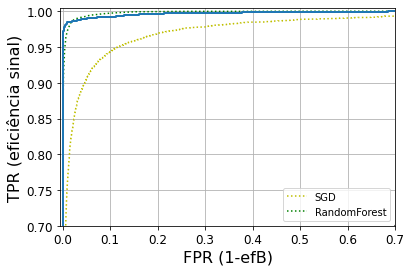

In [67]:
plt.plot(fpr,tpr,"y:",label="SGD")
plt.plot(fpr_forest,tpr_forest,"g:",label="RandomForest")
plot_roc_curve(fpr_mlp,tpr_mlp)
plt.axis([-0.005,0.7,0.7,1.004])

plt.legend(loc="lower right")

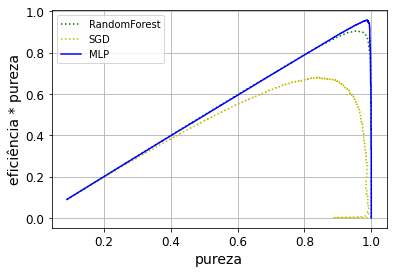

In [68]:
plt.plot(prec_forest,prec_forest*rec_forest,"g:",label="RandomForest")
plt.plot(precisions,precisions*recalls,"y:",label="SGD")
plt.plot(prec_mlp,rec_mlp*prec_mlp,"blue",label="MLP")
plt.grid(True)
plt.xlabel("pureza")
plt.ylabel("eficiência * pureza")
plt.legend(loc="upper left")
plt.show()

Melhor Eficiencia:  0.9706101190476191  Melhor precisão:  0.9865759122707506
Melhor valor do threshold:  0.5346575


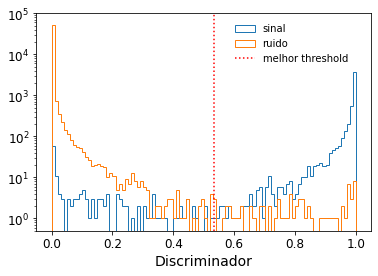

In [69]:
idxmaxeffpur = np.argmax(prec_mlp*rec_mlp)
#effpurmax = np.max(prec_mlp*rec_mlp)
#print(effpurmax,idxmaxeffpur)
print("Melhor Eficiencia: ",rec_mlp[idxmaxeffpur]," Melhor precisão: ",prec_mlp[idxmaxeffpur])
best_thresh_mlp=thresh_mlp[np.argmax(prec_mlp>=prec_mlp[idxmaxeffpur])]
print("Melhor valor do threshold: ",best_thresh_mlp)
y_pred_mlp_best = (y_pred_mlp>= best_thresh_mlp)
f1_score(y_train_5,y_pred_mlp_best)
plt.hist(y_pred_mlp[y_train_5] ,bins=100,range=(0,1),histtype='step',label="sinal")
plt.hist(y_pred_mlp[~y_train_5],bins=100,range=(0,1),histtype='step',label="ruido")
plt.plot([best_thresh_mlp,best_thresh_mlp],[0.5,1e5],"r:",label="melhor threshold")
plt.axis([-0.05,1.05,0.5,1e5])
plt.yscale("log")
plt.xlabel("Discriminador")
plt.legend(loc=(0.58,0.75),frameon=False)
plt.show()